In [1]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort("symbol")

df = df.with_columns([
    (pl.col('quote_volume') - pl.col('taker_buy_quote_volume')).alias('taker_sell_quote_volume'),
    (pl.col('close') / (pl.col('close').shift(1).over('symbol')) - 1).alias('return')
])

N = 25

df = df.with_columns([
    pl.col('taker_buy_quote_volume').rolling_sum(N).over('symbol').alias('taker_buy_quote_volume_sum'),
    pl.col('taker_sell_quote_volume').rolling_sum(N).over('symbol').alias('taker_sell_quote_volume_sum'),
])

df = df.with_columns([
    (pl.col('taker_buy_quote_volume_sum') - pl.col('taker_sell_quote_volume_sum')).alias('net_taker_quote_volume'),
    (pl.col('taker_buy_quote_volume_sum') + pl.col('taker_sell_quote_volume_sum')).alias('total_taker_quote_volume')
])

# 按日期和因子值排序并进行排名
df = df.with_columns([
    pl.col("net_taker_quote_volume").rank("dense").over("open_time").alias("net_taker_rank"),
    pl.col("total_taker_quote_volume").rank("dense").over("open_time").alias("total_taker_rank")
])

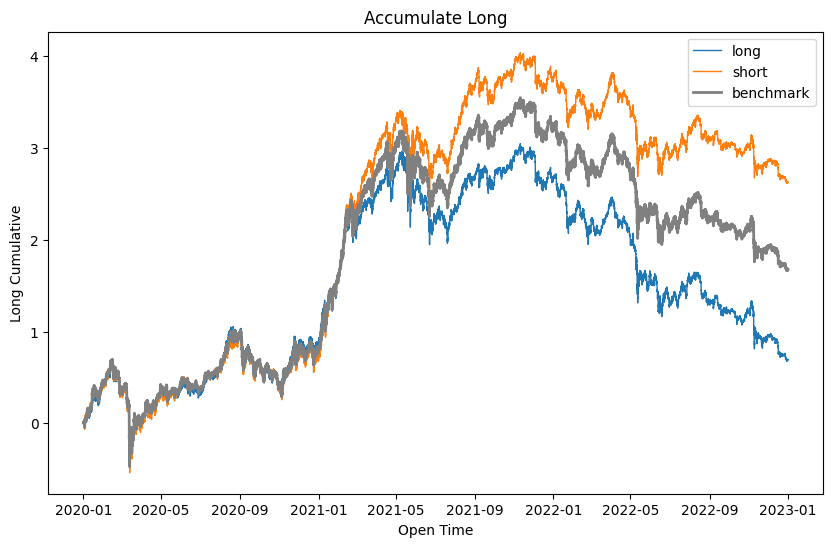

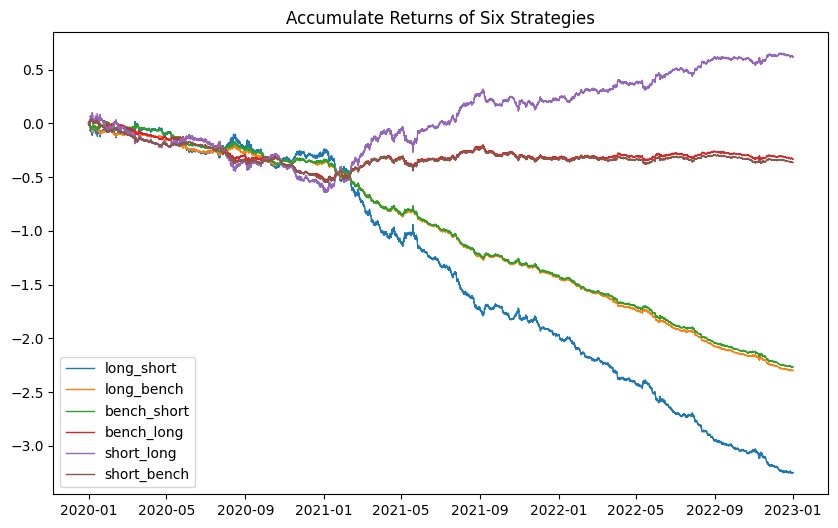

long: 
ann_return = 0.2301  sharpe = 0.2093  maxdd = 0.6761  calmar_ratio = 0.3403  

short: 
ann_return = 0.8739  sharpe = 0.801  maxdd = 0.7271  calmar_ratio = 1.2019  

bench: 
ann_return = 0.5575  sharpe = 0.513  maxdd = 0.6895  calmar_ratio = 0.8085  

long_short: 
ann_return = -1.0818  sharpe = -3.9469  maxdd = 3.2175  calmar_ratio = -0.3362  

long_bench: 
ann_return = -0.7654  sharpe = -5.4651  maxdd = 2.304  calmar_ratio = -0.3322  

bench_long: 
ann_return = -0.1106  sharpe = -0.7897  maxdd = 0.5661  calmar_ratio = -0.1954  

short_long: 
ann_return = 0.2058  sharpe = 0.7509  maxdd = 0.6746  calmar_ratio = 0.3051  

short_bench: 
ann_return = -0.1216  sharpe = -0.8711  maxdd = 0.5666  calmar_ratio = -0.2146  

bench_short: 
ann_return = -0.7544  sharpe = -5.4049  maxdd = 2.2425  calmar_ratio = -0.3364  



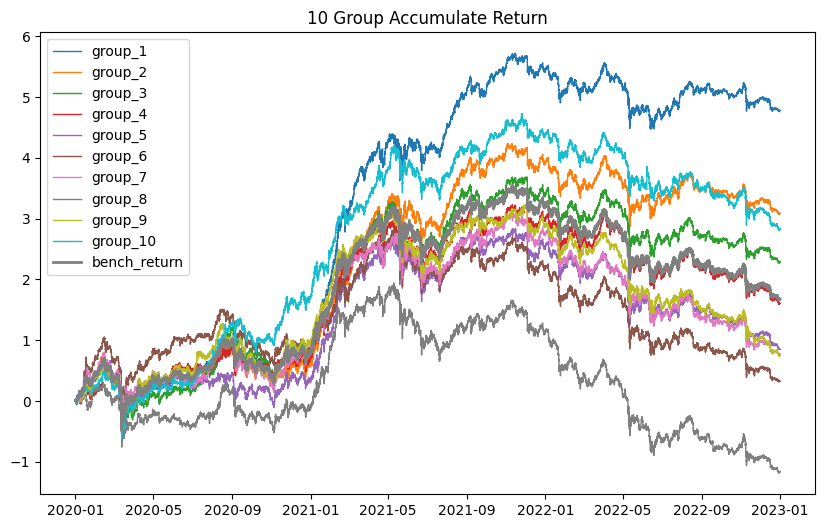

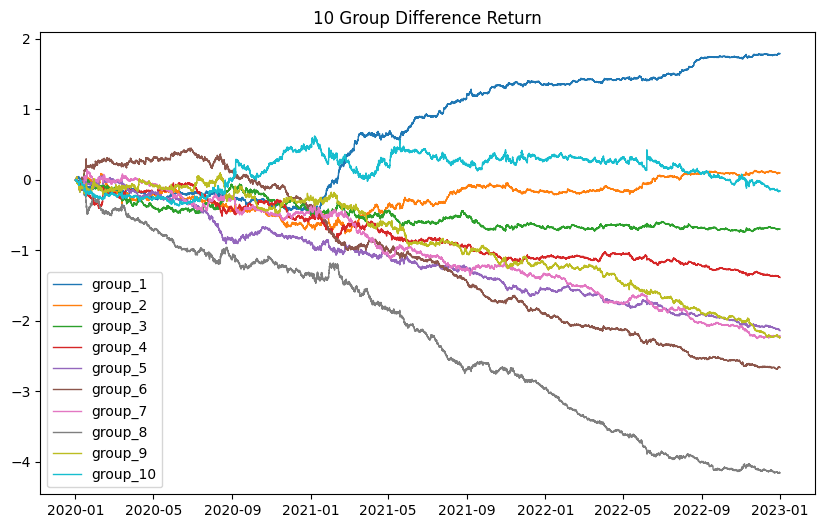

group_1: 
ann_return = 1.5913  sharpe = 1.46  maxdd = 0.7131  calmar_ratio = 2.2315  

group_2: 
ann_return = 1.0272  sharpe = 0.8998  maxdd = 0.8236  calmar_ratio = 1.2471  

group_3: 
ann_return = 0.7623  sharpe = 0.6692  maxdd = 0.8113  calmar_ratio = 0.9396  

group_4: 
ann_return = 0.5336  sharpe = 0.4744  maxdd = 0.7319  calmar_ratio = 0.7291  

group_5: 
ann_return = 0.2822  sharpe = 0.2478  maxdd = 0.6771  calmar_ratio = 0.4168  

group_6: 
ann_return = 0.1078  sharpe = 0.0931  maxdd = 0.6563  calmar_ratio = 0.1643  

group_7: 
ann_return = 0.2571  sharpe = 0.2193  maxdd = 0.6549  calmar_ratio = 0.3926  

group_8: 
ann_return = -0.3895  sharpe = -0.3341  maxdd = 1.0642  calmar_ratio = -0.366  

group_9: 
ann_return = 0.2495  sharpe = 0.2118  maxdd = 0.6633  calmar_ratio = 0.3761  

group_10: 
ann_return = 0.9428  sharpe = 0.8432  maxdd = 0.7425  calmar_ratio = 1.2697  

-----------------------------------------
group_difference_1: 
ann_return = 0.5958  sharpe = 1.9902  maxdd = 

In [2]:
factors = df.select(['open_time', 'symbol', 'total_taker_quote_volume'])

from factor_analysis.factor_analysis import FactorAnalysis

# 使用示例
analysis = FactorAnalysis(factors, data)
analysis.run_full_analysis()